<a href="https://colab.research.google.com/github/Nhatnguyen2001/NHAN_DANG_BIEN_BAO_GIAO_THONG_VN_REALTIME/blob/main/NHAN_DIEN_BIEN_BAO_GIAO_THONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#thêm một số thư viện cần thiết
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [ ]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#thêm hàm con để vẽ đồ thị
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()


In [ ]:
# Load Data 
with open('/content/drive/MyDrive/Colab Notebooks/PROJECT_AI_BIEN_BAO_GIAO_THONG/data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train, 31)
x_train, y_train = shuffle(x_train, y_train)
x_train.shape


(1558, 150, 150, 3)

In [ ]:
# Model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.2)
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.2)
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.2)
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.2)
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
Dropout(0.3)
model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
Dropout(0.3)
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
Dropout(0.3)
model.add(Dense(31,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 64)      

In [ ]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.3)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 2s 47ms/step - loss: 4.9966 - acc: 0.0450 - val_loss: 3.4080 - val_acc: 0.0684
Epoch 2/100
22/22 [==============================] - 1s 30ms/step - loss: 2.9894 - acc: 0.1771 - val_loss: 2.5357 - val_acc: 0.2692
Epoch 3/100
22/22 [==============================] - 1s 30ms/step - loss: 2.0762 - acc: 0.3844 - val_loss: 1.8925 - val_acc: 0.3547
Epoch 4/100
22/22 [==============================] - 1s 31ms/step - loss: 1.4770 - acc: 0.5037 - val_loss: 1.3889 - val_acc: 0.4915
Epoch 5/100
22/22 [==============================] - 1s 30ms/step - loss: 1.1148 - acc: 0.6128 - val_loss: 1.0852 - val_acc: 0.5962
Epoch 6/100
22/22 [==============================] - 1s 30ms/step - loss: 0.8439 - acc: 0.7064 - val_loss: 0.9965 - val_acc: 0.6218
Epoch 7/100
22/22 [==============================] - 1s 30ms/step - loss: 0.6710 - acc: 0.7596 - val_loss: 0.7781 - val_acc: 0.7051
Epoch 8/100
22/22 [==============================] - 1s 30ms/step - loss: 0.4773 - acc: 

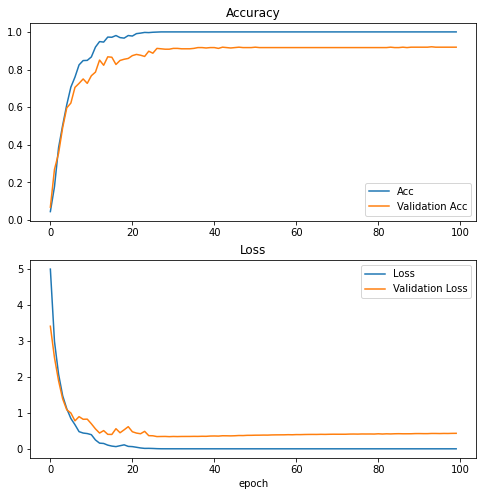

In [ ]:
plot_history(his)

In [ ]:
model.save("model_v2.h5")

In [ ]:
f = open("biengiaothong.txt","r")
label = []

while 1 :
  hello = f.readline().split(",")[-1].split("\n")[0]
  if hello != "":
    label.append(hello)
  else:
    break
label

['bienBaoCongTrinhDangThiCong',
 'bienBaoDuongBiHep',
 'BienBaoNguyHiem',
 'bienCanhBao',
 'camBamCoi',
 'camDiNguocChieu',
 'camDiThang',
 'camDoNgayLe',
 'camDungVaDoXe',
 'camMoTo',
 'camNguoiDiBo',
 'camNguoiDiBocatNgang',
 'camOto',
 'camOtoQuayDau',
 'camOtoTai',
 'camReTrai',
 'duongCam',
 'duongTronTruot',
 'giaoNhauCoTinHieuDen',
 'giaoNhauVoiDuongKhongUuTien',
 'hanCheTrongLuongXe',
 'hetCamVuot',
 'khongXacDinh',
 'noiGiaoNhauChayTheoVongXuyen',
 'tocDoToiDaChoPhep20',
 'tocDoToiDaChoPhep30',
 'tocDoToiDaChoPhep40',
 'tocDoToiDaChoPhep50',
 'tocDoToiDaChoPhep60',
 'tocDoToiDaChoPhep70',
 'tocDoToiDaChoPhep80']

bienBaoCongTrinhDangThiCong


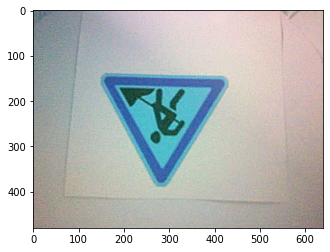

In [ ]:
 img=cv2.imread('3.jpg')
plt.imshow(img)
img = cv2.resize(img,(150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)
index = np.argmax(model.predict(img))
print(label[index])

(-0.5, 639.5, 479.5, -0.5)

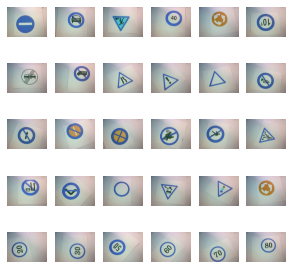

In [ ]:

# code for displaying multiple images in one figure
  
#import libraries
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(5, 5))
  
# setting values to rows and column variables
rows = 5
columns = 6
  
# reading images
Image1 = cv2.imread('1.jpg')
Image2 = cv2.imread('2.jpg')
Image3 = cv2.imread('3.jpg')
Image4 = cv2.imread('4.jpg')
Image5 = cv2.imread('5.jpg')
Image6 = cv2.imread('6.jpg')
Image7 = cv2.imread('7.jpg')
Image8 = cv2.imread('8.jpg')
Image9 = cv2.imread('9.jpg')
Image10 = cv2.imread('10.jpg')
Image11 = cv2.imread('11.jpg')
Image12 = cv2.imread('12.jpg')
Image13 = cv2.imread('13.jpg')
Image14 = cv2.imread('14.jpg')
Image15 = cv2.imread('15.jpg')
Image16 = cv2.imread('16.jpg')
Image17 = cv2.imread('17.jpg')
Image18 = cv2.imread('18.jpg')
Image19 = cv2.imread('19.jpg')
Image20 = cv2.imread('20.jpg')
Image21 = cv2.imread('21.jpg')
Image22 = cv2.imread('22.jpg')
Image23 = cv2.imread('23.jpg')
Image24 = cv2.imread('24.jpg')
Image25 = cv2.imread('25.jpg')
Image26 = cv2.imread('26.jpg')
Image27 = cv2.imread('27.jpg')
Image28 = cv2.imread('28.jpg')
Image29 = cv2.imread('29.jpg')
Image30 = cv2.imread('30.jpg')
Image31 = cv2.imread('31.jpg')
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(Image4)
plt.axis('off')

fig.add_subplot(rows, columns, 5)
# showing image
plt.imshow(Image25)
plt.axis('off')

fig.add_subplot(rows, columns, 6)
# showing image
plt.imshow(Image6)
plt.axis('off')

fig.add_subplot(rows, columns, 7)
# showing image
plt.imshow(Image7)
plt.axis('off')

fig.add_subplot(rows, columns, 8)
# showing image
plt.imshow(Image8)
plt.axis('off')

fig.add_subplot(rows, columns, 9)
# showing image
plt.imshow(Image9)
plt.axis('off')

fig.add_subplot(rows, columns, 10)
# showing image
plt.imshow(Image10)
plt.axis('off')

fig.add_subplot(rows, columns, 11)
# showing image
plt.imshow(Image11)
plt.axis('off')

fig.add_subplot(rows, columns, 12)
# showing image
plt.imshow(Image12)
plt.axis('off')

fig.add_subplot(rows, columns, 13)
# showing image
plt.imshow(Image13)
plt.axis('off')

fig.add_subplot(rows, columns, 14)
# showing image
plt.imshow(Image14)
plt.axis('off')

fig.add_subplot(rows, columns, 15)
# showing image
plt.imshow(Image15)
plt.axis('off')

fig.add_subplot(rows, columns, 16)
# showing image
plt.imshow(Image16)
plt.axis('off')

fig.add_subplot(rows, columns, 17)
# showing image
plt.imshow(Image17)
plt.axis('off')

fig.add_subplot(rows, columns, 18)
# showing image
plt.imshow(Image18)
plt.axis('off')



fig.add_subplot(rows, columns, 19)
# showing image
plt.imshow(Image20)
plt.axis('off')

fig.add_subplot(rows, columns, 20)
# showing image
plt.imshow(Image21)
plt.axis('off')

fig.add_subplot(rows, columns, 21)
# showing image
plt.imshow(Image22)
plt.axis('off')

fig.add_subplot(rows, columns, 22)
# showing image
plt.imshow(Image23)
plt.axis('off')

fig.add_subplot(rows, columns, 23)
# showing image
plt.imshow(Image24)
plt.axis('off')

fig.add_subplot(rows, columns, 24)
# showing image
plt.imshow(Image25)
plt.axis('off')

fig.add_subplot(rows, columns, 25)
# showing image
plt.imshow(Image26)
plt.axis('off')

fig.add_subplot(rows, columns, 26)
# showing image
plt.imshow(Image27)
plt.axis('off')

fig.add_subplot(rows, columns, 27)
# showing image
plt.imshow(Image28)
plt.axis('off')

fig.add_subplot(rows, columns, 28)
# showing image
plt.imshow(Image29)
plt.axis('off')

fig.add_subplot(rows, columns, 29)
# showing image
plt.imshow(Image30)
plt.axis('off')

fig.add_subplot(rows, columns, 30)
# showing image
plt.imshow(Image31)
plt.axis('off')
